## DRILL: Prepare the Data

[Download the Excel file here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) on crime data in New York State in 2013, provided by the FBI: UCR ([Thinkful mirror](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv)).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features.  Robbery and Murder are currently continuous variables.  For this model, please use these variables to create  categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.  You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready.  Don't forget basic data cleaning procedures, either!  Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.


In [107]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

In [89]:
raw_data = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', skiprows=4)
raw_data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [90]:
raw_data.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


In [91]:
isolated1 = raw_data[['Property\ncrime', 'Population', 'Robbery', 'Murder and\nnonnegligent\nmanslaughter']]
isolated1['PopSquared'] = isolated1['Population']**2
isolated1.head()

/Users/justinhoijer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Property crime,Population,Robbery,Murder and nonnegligent manslaughter,PopSquared
0,12.0,1861.0,0.0,0.0,3.463321e+06
1,24.0,2577.0,0.0,0.0,6.640929e+06
2,16.0,2846.0,0.0,0.0,8.099716e+06
3,4090.0,97956.0,227.0,8.0,9.595378e+09
4,223.0,6388.0,4.0,0.0,4.080654e+07


In [92]:
isolated1 = isolated1.dropna(axis=0)
isolated1.tail()

,Property crime,Population,Robbery,Murder and nonnegligent manslaughter,PopSquared
343,541.0,10685.0,2.0,0.0,1.141692e+08
344,17.0,829.0,0.0,0.0,6.872410e+05
345,58.0,5931.0,0.0,0.0,3.517676e+07
346,2368.0,199134.0,390.0,6.0,3.965435e+10
347,334.0,36643.0,2.0,0.0,1.342709e+09


In [93]:
isolated1['Murders'] = isolated1['Murder and\nnonnegligent\nmanslaughter']
isolated1['robbery'] = isolated1['Robbery']

In [94]:
series = isolated1['Murders']
x = 0
for i in series:
    
    if i == 0:
        isolated1['Murders'][x] = 0
        x+=1
    else:
        isolated1['Murders'][x] = 1
        x+=1

In [95]:
series = isolated1['robbery']
x = 0
for i in series:
    
    if i == 0:
        isolated1['robbery'][x] = 0
        x+=1
    else:
        isolated1['robbery'][x] = 1
        x+=1

In [96]:
isolated1.loc[:10]

,Property crime,Population,Robbery,Murder and nonnegligent manslaughter,PopSquared,Murders,robbery
0,12.0,1861.0,0.0,0.0,3.463321e+06,0.0,0.0
1,24.0,2577.0,0.0,0.0,6.640929e+06,0.0,0.0
2,16.0,2846.0,0.0,0.0,8.099716e+06,0.0,0.0
3,4090.0,97956.0,227.0,8.0,9.595378e+09,1.0,1.0
4,223.0,6388.0,4.0,0.0,4.080654e+07,0.0,1.0
5,46.0,4089.0,3.0,0.0,1.671992e+07,0.0,1.0
6,10.0,1781.0,0.0,0.0,3.171961e+06,0.0,0.0
7,2118.0,118296.0,31.0,1.0,1.399394e+10,1.0,1.0
8,210.0,9519.0,4.0,0.0,9.061136e+07,0.0,1.0
9,405.0,18182.0,12.0,0.0,3.305851e+08,0.0,1.0


In [100]:
data = isolated1[['Property\ncrime', 'Population', 'PopSquared','Murders', 'robbery']]
data.head()

,Property crime,Population,PopSquared,Murders,robbery
0,12.0,1861.0,3.463321e+06,0.0,0.0
1,24.0,2577.0,6.640929e+06,0.0,0.0
2,16.0,2846.0,8.099716e+06,0.0,0.0
3,4090.0,97956.0,9.595378e+09,1.0,1.0
4,223.0,6388.0,4.080654e+07,0.0,1.0


#### Dealing With Outliers

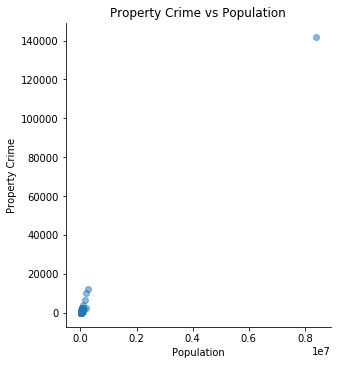

In [109]:
g = sns.lmplot(y='Property\ncrime', 
              x='Population', 
              data=data, 
              fit_reg=False, 
              scatter_kws={'alpha':0.5})
g.set_ylabels("Property Crime")
g.set_xlabels("Population")
plt.title('Property Crime vs Population')
plt.show()

In [114]:
outlier = data.Population.max()
data.loc[data.Population == outlier]

,Property crime,Population,PopSquared,Murders,robbery
216,141971.0,8396126.0,7.049493e+13,1.0,1.0


In [115]:
data = data[data['Population']< 8000000]

In [117]:
data.describe()

,Property crime,Population,PopSquared,Murders,robbery
count,347.000000,347.000000,3.470000e+02,347.000000,347.000000
mean,385.752161,15956.685879,9.858407e+08,0.138329,0.599424
std,1034.369072,27080.218837,5.067232e+09,0.345743,0.490723
min,0.000000,526.000000,2.766760e+05,0.000000,0.000000
25%,40.000000,2997.000000,8.982153e+06,0.000000,0.000000
50%,112.000000,7187.000000,5.165297e+07,0.000000,1.000000
75%,340.500000,18160.500000,3.298042e+08,0.000000,1.000000
max,12491.000000,258789.000000,6.697175e+10,1.000000,1.000000


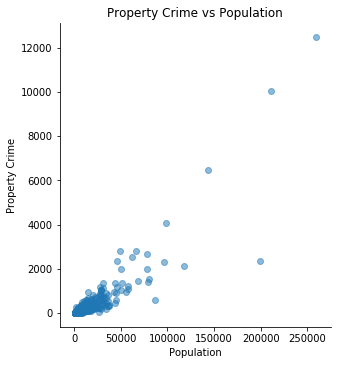

In [118]:
g = sns.lmplot(y='Property\ncrime', 
              x='Population', 
              data=data, 
              fit_reg=False, 
              scatter_kws={'alpha':0.5})
g.set_ylabels("Property Crime")
g.set_xlabels("Population")
plt.title('Property Crime vs Population')
plt.show()